# EE2211 Tutorial 9

### by Chua Dingjuan (Oct 2022)

## Question 3 Python Codes

### 3) Fit a regression tree to depth 2 and compare your results with results generated by “from sklearn.tree import DecisionTreeRegressor” using the “mean square error” criterion.  

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\Dingjuan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include 

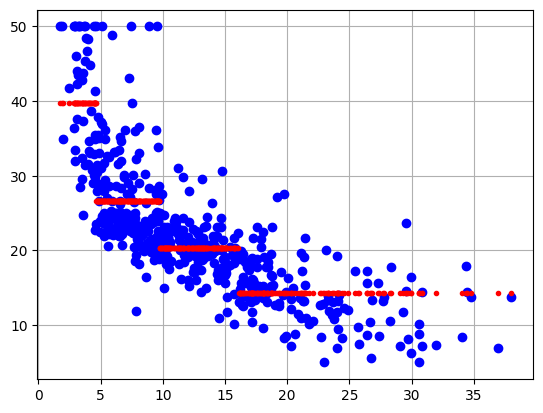

In [4]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


boston = datasets.load_boston()

#FYI ONLY (type boston. and tab to see the following options!)
print(boston.DESCR)
print(boston.feature_names)

#print(boston.data)
#print(boston.data.shape)
#print(boston.target) 

##--- USING SKLEARN ----##

#Extracting LSTAT and MEDV as xtrain and ytrain
xtrain = boston.data[:,12]
xtrain=xtrain.reshape((len(xtrain),1))
#print(xtrain.shape)
ytrain=boston.target
ytrain=ytrain.reshape((len(ytrain),1))


#Using decision tree in sklearn
from sklearn.tree import DecisionTreeRegressor

#Creating an object called tree and applying it to training data
tree = DecisionTreeRegressor(criterion='mse', max_depth=2)
tree.fit(xtrain, ytrain)

#Calculating predicted y values for xtrain values
#y_pred = tree.predict(xtrain)
y_pred = tree.predict(xtrain)
#print(y_pred)

plt.figure(1)
plt.plot(xtrain,ytrain,'bo')
plt.plot(xtrain,y_pred,'r.',label="scikit-learn")
plt.grid()  
plt.show()



[ 1.73  1.92  1.98  2.47  2.87  2.88  2.94  2.96  2.97  2.98  3.01  3.11
  3.11  3.13  3.16  3.16  3.26  3.32  3.33  3.53  3.53  3.54  3.56  3.57
  3.59  3.7   3.73  3.76  3.76  3.81  3.92  3.95  3.95  4.03  4.08  4.14
  4.16  4.21  4.32  4.38  4.45  4.45  4.5   4.54  4.56  4.56  4.59  4.59
  4.61  4.63  4.67  4.69  4.7   4.73  4.74  4.81  4.82  4.84  4.85  4.86
  4.97  4.98  5.03  5.04  5.08  5.1   5.12  5.19  5.21  5.25  5.28  5.29
  5.29  5.33  5.33  5.39  5.49  5.49  5.5   5.5   5.52  5.57  5.64  5.68
  5.68  5.7   5.77  5.81  5.89  5.9   5.91  5.98  5.98  5.99  6.05  6.07
  6.12  6.15  6.19  6.21  6.27  6.29  6.36  6.36  6.36  6.43  6.47  6.48
  6.53  6.56  6.57  6.58  6.58  6.59  6.62  6.65  6.68  6.72  6.72  6.73
  6.75  6.78  6.86  6.87  6.9   6.92  6.93  7.01  7.12  7.14  7.18  7.19
  7.2   7.22  7.26  7.34  7.37  7.39  7.39  7.43  7.44  7.44  7.51  7.53
  7.54  7.56  7.6   7.6   7.67  7.7   7.73  7.74  7.79  7.79  7.79  7.83
  7.85  7.88  7.9   8.01  8.05  8.05  8.05  8.1   8

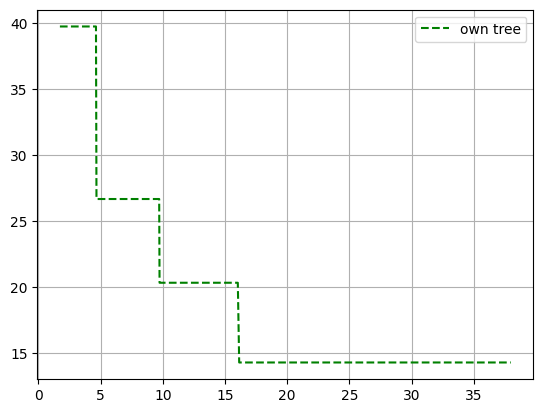

In [2]:
##-- GROWING YOUR OWN TREE --##
xtrain = boston.data[:,12]

#sorting data according to x values
#argsort is a numpy function that returns the indices that would sort this array xtrain
xtrain = boston.data[:,12]
sorted_index = xtrain.argsort()
xtrain = xtrain[sorted_index]
print(xtrain)

#Remember to sort y accordingly too
ytrain=boston.target
ytrain = ytrain[sorted_index]


# This function finds the best threshold in given dataset y according to minimum sum of squared errors
def find_best_split(y):
    
    # index represents last element in the below threshold node
    sq_err_vec = np.zeros(len(y)-1)    
    for index in range(0, len(y)-1):
        
        # split the data
        data_below_threshold = y[:index+1]  # ==> from 0 to index+1
        data_above_threshold = y[index+1:]  # ==> index+1 to the end of array
        
        # Compute estimate
        mean_below_threshold = np.mean(data_below_threshold)
        mean_above_threshold = np.mean(data_above_threshold)
        
        # Compute total square error
        # Note that MSE = total square error divided by number of data points
        below_sq_err = np.sum(np.square(data_below_threshold - mean_below_threshold))
        above_sq_err = np.sum(np.square(data_above_threshold - mean_above_threshold))
        sq_err_vec[index] = below_sq_err + above_sq_err
    
    #np.argmin returns the index of the minimum value in this array
    best_index = np.argmin(sq_err_vec)
    
    yL = y[:best_index+1]   #y values in node A / left side
    yR = y[best_index+1:]   #y values in node B  / right side

    return yL, yR




#Splitting data at first level (depth = 1 )
yA, yB = find_best_split(ytrain)

#Splitting data at second level (depth = 2)
yA1, yA2 = find_best_split(yA)
yB1, yB2 = find_best_split(yB)

#Calculating the regression tree y values (average of y values in this node)
yA1_pred = np.mean(yA1)
yA2_pred = np.mean(yA2)
yB1_pred = np.mean(yB1)
yB2_pred = np.mean(yB2)

#generating the y values for plotting
y_pred_plotting = np.concatenate([yA1_pred*np.ones(len(yA1)),yA2_pred*np.ones(len(yA2)),yB1_pred*np.ones(len(yB1)),yB2_pred*np.ones(len(yB2))])

plt.plot(xtrain,y_pred_plotting,'g', linestyle='dashed',label="own tree")
plt.legend()
plt.grid()
plt.show()